In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [10]:
# deal with ratings.csv
ratings_data = pd.read_csv('ratings.csv')
ratings_grouped = ratings_data.groupby('movieId').mean().reset_index()
# ratings_grouped.drop(['timestamp', 'userId'], axis = 1, inplace = True)
ratings_grouped.rename(columns={'movieId':'id'}, inplace=True)
ratings_grouped.dropna()

ratings_grouped.head()
#ratings_grouped.info()

,id,userId,rating,timestamp
0,1,135121.043616,3.888157,1.113440e+09
1,2,134877.953761,3.236953,1.088621e+09
2,3,136520.452733,3.175550,9.661124e+08
3,4,136249.536062,2.875713,9.390243e+08
4,5,135293.275855,3.079565,9.896788e+08


In [11]:
# deal with movies_metadata.csv
movies_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
movies_metadata.drop(['adult', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'], axis = 1, inplace = True)

movies_metadata.head(10)

,budget,id
0,30000000,862
1,65000000,8844
2,0,15602
3,16000000,31357
4,0,11862
5,60000000,949
6,58000000,11860
7,0,45325
8,35000000,9091
9,58000000,710


In [12]:
# merging data from the 2 different csv files together based on equivalent movie id
movies_metadata['id'] = movies_metadata['id'].astype(str)
ratings_grouped['id'] = ratings_grouped['id'].astype(str)
merged_data = movies_metadata.merge(ratings_grouped, on='id', how='inner')

Text(0, 0.5, 'Rating')

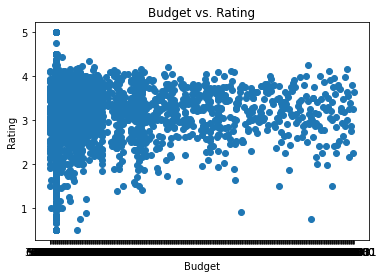

In [13]:
# plot the data (budget vs. rating)
plt.scatter(merged_data.budget, merged_data.rating)
plt.title('Budget vs. Rating')
plt.xlabel('Budget')
plt.ylabel('Rating')

In [29]:
# cleaning links.csv ...
links_data = pd.read_csv('links.csv')
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [30]:
# cleaning credits.csv ...
credits_data = pd.read_csv('credits.csv')
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [31]:
# cleaning keywords.csv ...
keywords_data = pd.read_csv('keywords.csv')
keywords_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB
